In [1]:
%matplotlib inline
import numpy as np
import math
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from self_functions import *

In [ ]:
# 三维编队--正四面体
# D = np.array([
#     [ 1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0],
#     [-1,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0],
#     [ 0,  0,  0,  0, -1,  0,  0,  1,  1,  1,  0,  0],
#     [ 0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  1,  1],
#     [ 0,  0, -1,  0,  0, -1,  0,  0, -1,  0, -1,  0],
#     [ 0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0, -1]
# ])


# 维度 d: dimension is 3, agents moves in 3-dimensional world
d = 3

# 获取矩阵 D 的大小: n is num of agents, m is num of edges
# n, m = D.shape

# 三维编队--正四面体
# r = np.array([
#     [0.5, 0.5, 0.15],
#     [0.5, -0.5, -0.05],
#     [-0.5, -0.5, 0.05],
#     [-0.5, 0.5, -0.15],
#     [0, 0, 1],
#     [0, 0, -1]
# ])

# 通过关联矩阵 D 求取边集 edges
# edges = get_edges_from_incidence_matrix(D)

# 三维编队--正方体
# edges = np.array([
#     [1, 2],
#     [1, 4],
#     [1, 5],
#     [2, 3],
#     [2, 6],
#     [3, 4],
#     [3, 7],
#     [4, 8],
#     [5, 6],
#     [5, 8],
#     [6, 7],
#     [7, 8]
# ])

# r = np.array([
#     [0.5, 0.5, 0.5],
#     [0.5, -0.5, 0.5],
#     [-0.5, -0.5, 0.5],
#     [-0.5, 0.5, 0.5],
#     [0.5, 0.5, -0.5],
#     [0.5, -0.5, -0.5],
#     [-0.5, -0.5, -0.5],
#     [-0.5, 0.5, -0.5]
# ])

# 三维编队--正三面体
edges = np.array([
    [1, 3],
    [1, 4],
    [1, 5],
    [2, 3],
    [2, 4],
    [2, 5],
    [3, 4],
    [3, 5],
    [4, 5]
])

r = np.array([
    [0, 0, 1],
    [0, 0, -1],
    [1, math.sqrt(3), 0.05],
    [1, -math.sqrt(3), -0.05],
    [-2, 0, 0]
])

# edges = np.array([
#     [1, 4],
#     [2, 4],
#     [1, 3],
#     [2, 3]
# ])

# r = np.array([
#     [1, -1, 0],
#     [-1, 1, 3],
#     [1, 1, 1],
#     [-1, -1, 0]
# ])

n = r.shape[0]
m = edges.shape[0]

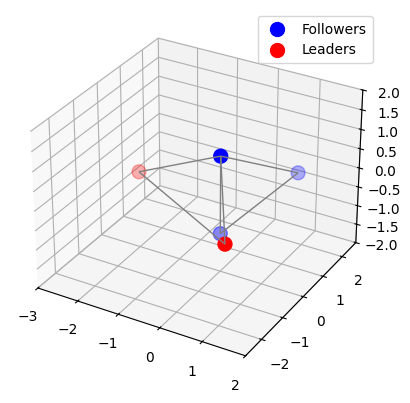

In [10]:
plot_3d_formation(r, edges)

In [11]:
# 生成权重矩阵 W, Wf, Wfl, Wff
l = np.array([0, 0, 1])     # 旋转轴
W, Wf, Wfl, Wff = generate_weight_matrix_final(r, edges, l)

In [12]:
# 检验 W 是否满足条件 1：W * p = 0
W_total = W.transpose(0, 2, 1, 3).reshape(3*n, 3*n)
Wf_total = W_total[:3*(n-2), :]
Wfl_total = Wf_total[:3*(n-2), 3*(n-2):]
Wff_total = Wf_total[:3*(n-2), :3*(n-2)]
r_total = r.flatten()
W_total.dot(r_total)

array([-2.22044605e-16,  0.00000000e+00, -1.25593980e-15,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.90303508e-16,  5.58563075e-16,
       -4.44089210e-16, -8.88178420e-16, -1.11022302e-16, -3.60822483e-16,
        0.00000000e+00, -4.99600361e-16,  2.91433544e-16])

In [13]:
# 检验 W_ff 的可逆性
print(Wff_total.shape)
print("rank(W_ff):", np.linalg.matrix_rank(Wff_total))

for i in range(3):
    for j in range(3):
        print(f"rank(W[{i+1}, {j+1}]):", np.linalg.matrix_rank(Wff[i, j]))
        if np.linalg.matrix_rank(Wff[i, j]) != 3:
            print(Wff[i, j])

(9, 9)
rank(W_ff): 6
rank(W[1, 1]): 3
rank(W[1, 2]): 2
[[ 0. -3.  0.]
 [ 3.  0.  0.]
 [ 0.  0.  0.]]
rank(W[1, 3]): 3
rank(W[2, 1]): 2
[[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]
rank(W[2, 2]): 2
[[ 0.  1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  0.]]
rank(W[2, 3]): 0
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
rank(W[3, 1]): 3
rank(W[3, 2]): 3
rank(W[3, 3]): 1
[[ 1.94289029e-16 -2.22044605e-16  0.00000000e+00]
 [ 2.22044605e-16  1.94289029e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.24087093e+00]]


In [7]:
# 检验 W 是否满足条件 2：Wij * R = R * Wij (交换律)
W_00 = W[0, 0]
rotation_matrix = R.from_rotvec(math.pi / 2 * l).as_matrix()
W_00.dot(rotation_matrix) - rotation_matrix.dot(W_00)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [18]:
# trajectory
# Define via points
via = np.array([
    [0, 0, 0],          # 编队中心点位置
    [5, 0, 0],
    [10, 0, 0],
    [10, -10, 0],
    [10, -20, 0],
    [5, -20, 0],
    [0, -20, 0],
    [0, -10, 0],
    [0, 0, 0]
])

# Define Rotation
rot = [
    [[0, 0, 1], 0],      # 旋转轴，旋转角度
    [[0, 0, 1], 0],
    [[0, 0, 1], -math.pi / 2],
    [[0, 0, 1], -math.pi / 2],
    [[0, 0, 1], -math.pi],
    [[0, 0, 1], -3 * math.pi / 2],
    [[0, 0, 1], -3 * math.pi / 2],
    [[0, 0, 1], -3 * math.pi / 2],
    [[0, 0, 1], -2*math.pi]
]

# Define Scale
sca = np.array([
    [1, 1, 1],          # x、y、z 缩放比例
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

# Initialize variables
ra = np.zeros((n, 3, via.shape[0])) # (agents num, dimension, via points num)
qvia = np.zeros((via.shape[0], 15))  # (via points num, translation(3) + rotation(9) + scale(3))

for j in range(via.shape[0]):
    translation = via[j, :]
    rotation = R.from_rotvec(rot[j][1] * np.array(rot[j][0])).as_matrix()
    scale = sca[j]
    qvia[j, :] = np.concatenate([translation, rotation.flatten(), scale])
    

# Generate trajectory
qr,dqr,ddqr,tr = mstraj_(qvia, 0.03, 0.2)

In [19]:
# 初始化
p_0 = r             # 初始位置，向量表示 (7, 3)
pF_0 = r[:n-2, :]   # 跟随者初始位置，向量表示 (5, 3)
pL_0 = r[n-2:]      # 领导者初始位置，向量表示 (2, 3)
v_0 = np.zeros((n, 3))      # 初始速度，向量表示 (7, 3)
vF_0 = np.zeros((n-2, 3))   # 跟随者初始速度，向量表示 (5, 3)
vL_0 = np.zeros((2, 3))     # 领导者初始速度，向量表示 (2, 3)

p_t = p_0.copy()
pF_t = pF_0.copy()
pL_t = pL_0.copy()
v_t = v_0
vF_t = vF_0
vL_t = vL_0

# 参数设定
t = 0
dt = 0.5
loop = 0
aL = 1  # 领导者控制参数
aF = 0.4  # 跟随者控制参数

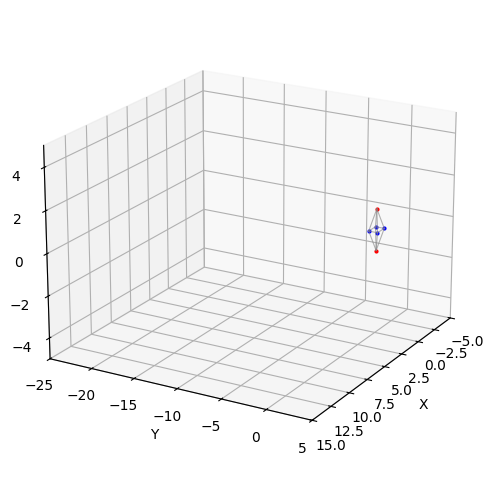

In [20]:
# 创建图形和三维轴
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-5, 15)
ax.set_ylim(-25, 5)
ax.set_zlim(-5, 5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=20, azim=30)  # 设置初始视角

# 创建初始的散点图和线条
points_f, = ax.plot([], [], [], 'o', markersize=2, color='blue')  # 初始为空，将在init函数中设置
points_l, = ax.plot([], [], [], 'o', markersize=2, color='red')  # 初始为空，将在init函数中设置
lines = []
title_text = ax.text2D(0.5, 0.95, "", transform=ax.transAxes, fontsize=14, ha='center')
for j, k in edges:
    line, = ax.plot([], [], [], color='gray', lw=0.8, alpha=0.6)
    lines.append(line)

# 动画初始化函数
def init():
    # 设置初始位置
    points_f.set_data(p_0[:-2,0], p_0[:-2,1])
    points_f.set_3d_properties(p_0[:-2,2])
    points_l.set_data(p_0[-2:,0], p_0[-2:,1])
    points_l.set_3d_properties(p_0[-2:,2])
    for m, (j, k) in enumerate(edges):
        lines[m].set_data([p_0[j-1, 0], p_0[k-1, 0]], [p_0[j-1, 1], p_0[k-1, 1]])
        lines[m].set_3d_properties([p_0[j-1, 2], p_0[k-1, 2]])
    # title_text = ax.text2D(0.5, 0.95, "t = 0.0", transform=ax.transAxes, fontsize=14, ha='center')
    return (points_f, points_l) + tuple(lines) +  (title_text,)

# 动画更新函数
def update(frame):
    global p_t, pF_t, pL_t, v_t, vF_t, vL_t, loop, t, dt, aL, aF, qr, edges
    
    # 帧数超过控制点数时退出
    if loop >= qr.shape[0]:
        loop = qr.shape[0] - 1
    
    # loop 时的目标控制
    translation = qr[loop, :3]
    rotation = qr[loop, 3:12].reshape(3, 3)
    scale = np.diag(qr[loop, 12:])

    # 领导者位置的目标位置
    pL_target = scale @ rotation @ pL_0.T + translation.reshape(3, 1)   # (3, 2)
    
    # 领导者速度的目标速度
    for i in range(l):
        vL_t[i] = [aL * np.tanh(pL_target[0, i] - pL_t[i, 0]), aL * np.tanh(pL_target[1, i] - pL_t[i, 1]), aL * np.tanh(pL_target[2, i] - pL_t[i, 2])]
    vL_t_total = vL_t.flatten()

    # 跟随者位置的目标位置
    pF_target = scale @ rotation @ pF_0.T + translation.reshape(3, 1)   # (3, 5)
    
    # 跟随者位置的目标速度
    vF_t_total = (-aF * (pF_t.flatten() + np.linalg.inv(Wff_total) @ Wfl_total @ pL_t.flatten())) - np.linalg.inv(Wff_total) @ Wfl_total @ vL_t_total
    vF_t = vF_t_total.reshape(n-l, 3)
    
    # 所有 agent 的位置和速度
    v_t = np.concatenate((vF_t, vL_t), axis=0)
    p_t += v_t * dt
    pF_t = p_t[:n-l, :]
    pL_t = p_t[n-l:, :]

    # 更新散点位置
    points_f.set_data(p_t[:-2,0], p_t[:-2,1])
    points_f.set_3d_properties(p_t[:-2,2])
    points_l.set_data(p_t[-2:,0], p_t[-2:,1])
    points_l.set_3d_properties(p_t[-2:,2])
    # 更新线条位置
    for m, (j, k) in enumerate(edges):
        lines[m].set_data([p_t[j-1, 0], p_t[k-1, 0]], [p_t[j-1, 1], p_t[k-1, 1]])
        lines[m].set_3d_properties([p_t[j-1, 2], p_t[k-1, 2]])
    # 更新时间
    t += dt
    loop += 1
    # 更新标题
    title_text.set_text(f"t = {t:.1f}")

    
    return (points_f, points_l) + tuple(lines) + (title_text,)

# 创建动画
ani = animation.FuncAnimation(
    fig, update,
    frames=int(qr.shape[0]),
    init_func=init,
    blit=True,
    interval=10
)

plt.show()

In [25]:
l = np.array([0, 0, 1])     # 旋转轴
l_x = skew_symmetric_matrix(l)
l = l.reshape(3, 1)
l_x @ l @ l.T

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])